# Chapter 8 - Python for Finance
In this notebook I am working through chapter 8 of the book Python for Finance, see https://home.tpq.io/books/py4fi/.

I provide additionnal comments with further interesting thoughts I had about the exercises and possible relations to other stuff I've learned in the past.


# Fundamentals

In [201]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')

mpl.rcParams['font.family'] = 'serif'
%matplotlib inline


Load data from five S%P 500 companies, the S&P 500 index itself, as well as gold price, volatility and exchange rate indicators from 01st January 2010 to 29th of June 2018.

In [202]:
filename = "./data/tr_eikon_eod_data.csv"
f = open(filename,"r")
lines = f.readlines()
header = lines[0].strip().split(",")
df = pd.read_csv(filename,
                 index_col=0, #first column are indeces
                 parse_dates=True) #interpret indeces as dates
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [203]:
df.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [204]:
df.tail()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58
2018-06-28,185.50,98.63,49.25,1701.45,223.42,270.89,2716.31,16.85,1.1567,1247.88,21.93,118.22
2018-06-29,185.11,98.61,49.71,1699.80,220.57,271.28,2718.37,16.09,1.1683,1252.25,22.31,118.65


<Axes: xlabel='Date'>

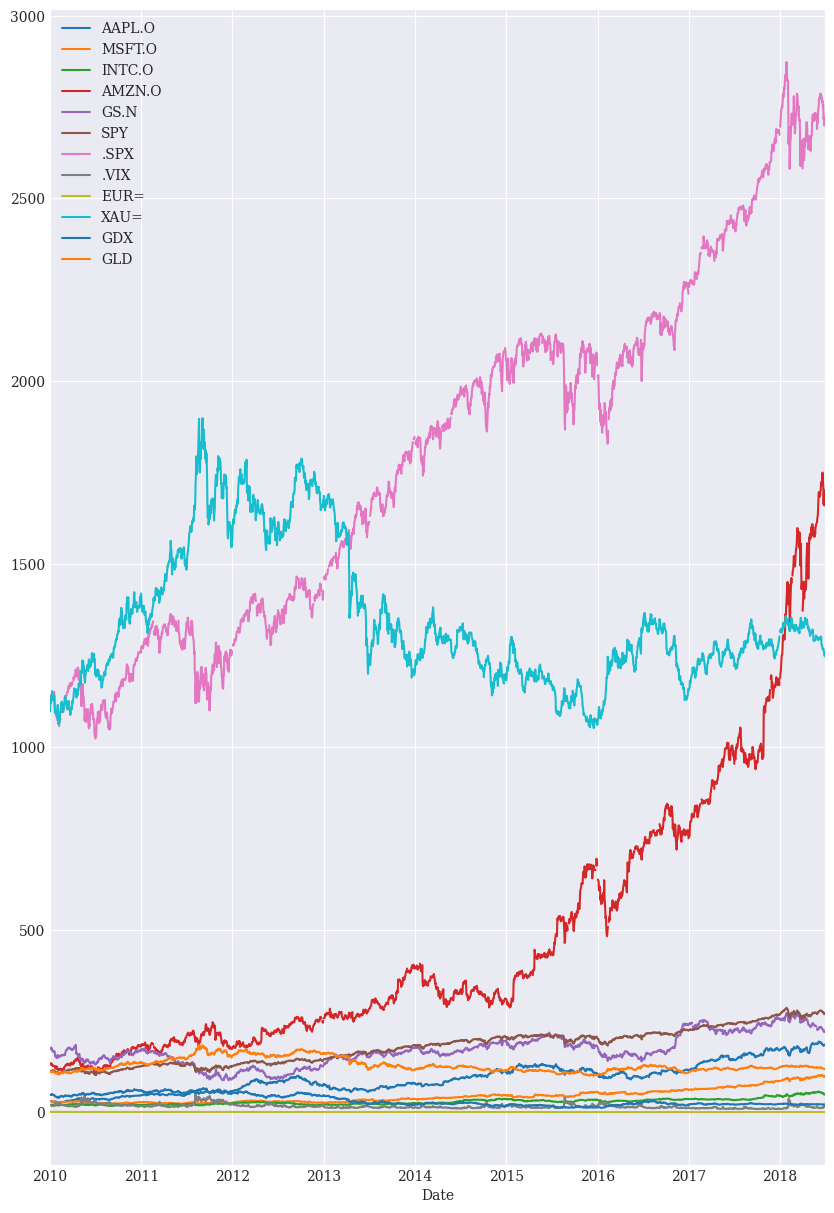

In [205]:
df.plot(figsize=(10,15)) #figsize = (width,height) of entire plot

Get general statistical metrics about the dataset.

In [206]:
df_mean_normalized = (df-df.mean())/df.std()
df_mean_normalized.describe().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.63,-1.10,-1.43,-1.00,-1.94,-1.62,-1.61,-1.34,-1.85,-1.58,-1.39,-1.58
25%,-0.82,-0.82,-0.84,-0.72,-0.56,-0.96,-0.96,-0.67,-1.03,-0.68,-0.75,-0.68
50%,-0.07,-0.25,-0.25,-0.43,-0.14,0.12,0.12,-0.25,0.19,-0.30,-0.52,-0.32
75%,0.59,0.50,0.65,0.59,0.52,0.64,0.63,0.35,0.85,0.42,0.97,0.47
max,2.48,2.97,3.39,3.41,2.43,2.20,2.21,5.26,2.06,2.91,2.18,2.90


In [207]:
df.median()
df.aggregate(['mean','median','min','max'],0)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
mean,93.455973,44.561115,29.364192,480.461251,170.216221,180.323029,1802.713106,17.027133,1.248587,1349.01413,33.566525,130.08659
median,90.550624,39.660000,27.330000,322.065000,164.430000,186.320000,1863.080000,15.585000,1.270250,1292.61000,25.625000,124.00500
min,27.435687,23.010000,17.665000,108.610000,87.700000,102.200000,1022.580000,9.140000,1.038500,1051.36000,12.470000,100.50000
max,193.980000,102.490000,57.080000,1750.080000,273.380000,286.580000,2872.870000,48.000000,1.482600,1898.99000,66.630000,184.59000


We now plot the absolute returns, that is to say $P_i-P_{i-1}$, units in Dollars. Then we plot the dimensionless relative returns, so $\frac{P_i-P_{i-1}}{P_{i-1}}$.

Interestingly to note, absolute returns are like numeric differentiation (Backwards Euler method) with a constant timestep (that we ignore). Because we are working with noisy data this leads to a very noisy result in the absolute returns. 

C:\Users\meneu\AppData\Local\Temp\ipykernel_24100\4127603591.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df.pct_change().plot(subplots=True,figsize=(10,15),title="Relative returns")
C:\Users\meneu\AppData\Local\Temp\ipykernel_24100\4127603591.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df.pct_change().mean()


AAPL.O    0.000936
MSFT.O    0.000621
INTC.O    0.000499
AMZN.O    0.001332
GS.N      0.000242
SPY       0.000436
.SPX      0.000438
.VIX      0.002888
EUR=     -0.000075
XAU=      0.000109
GDX      -0.000072
GLD       0.000085
dtype: float64

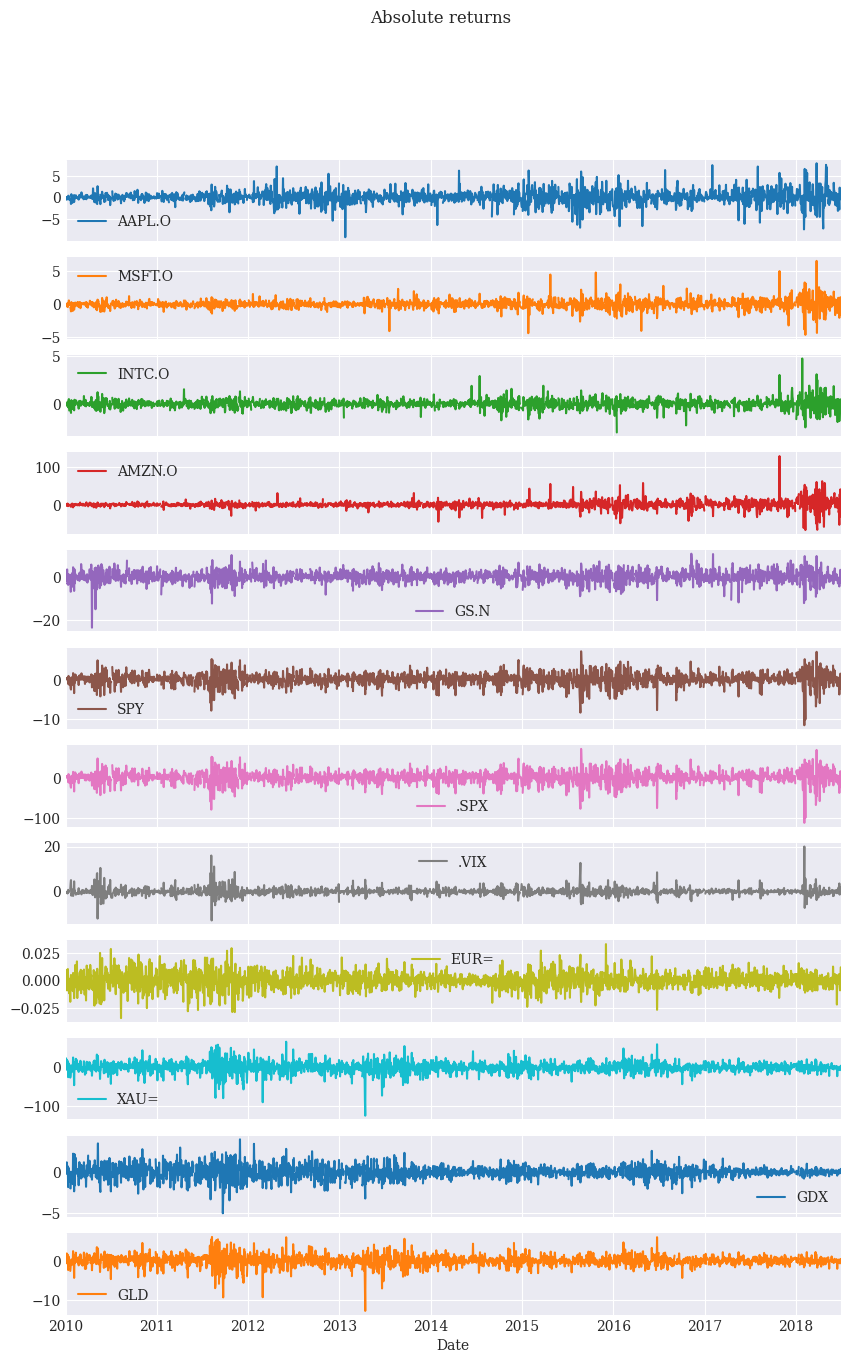

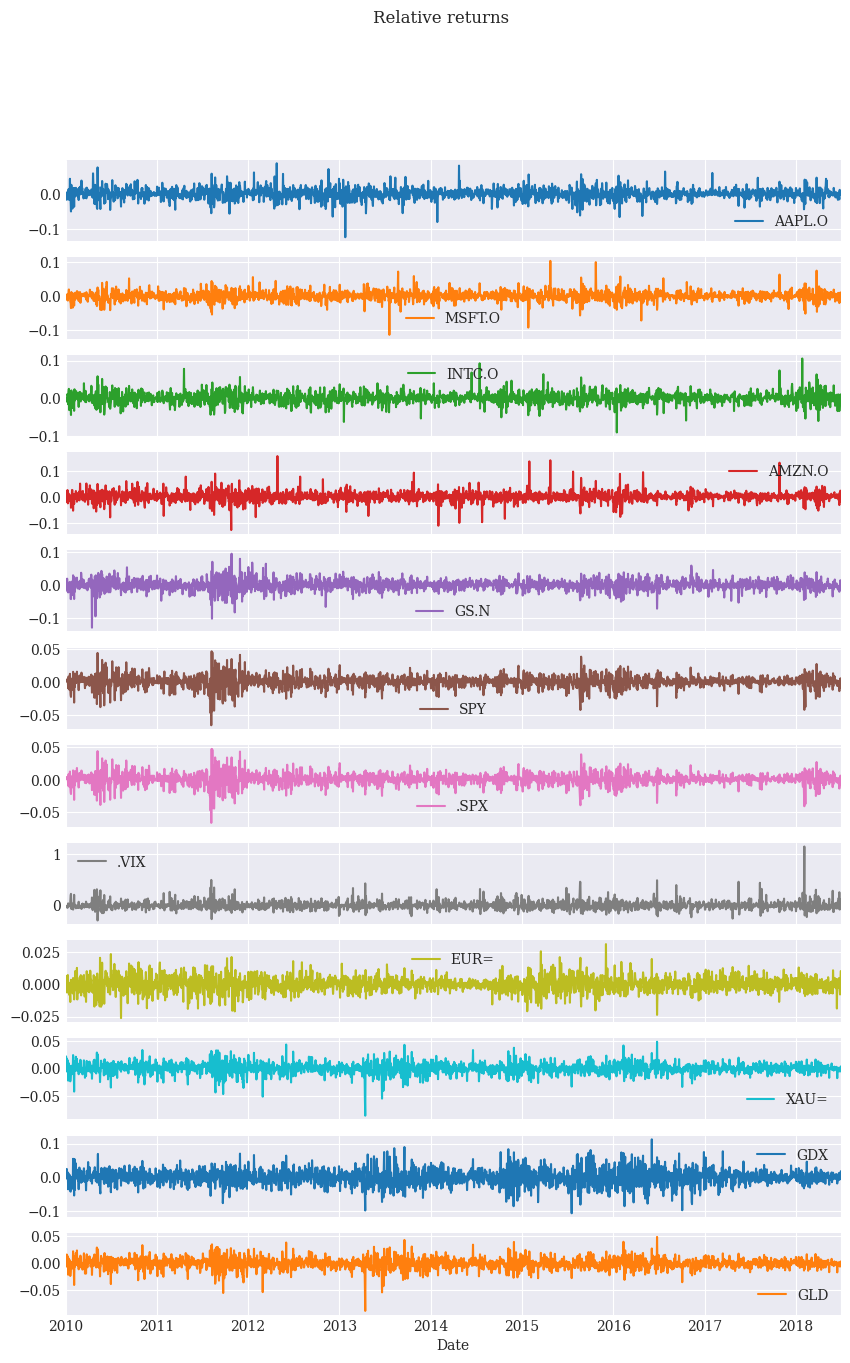

In [208]:
# Absolute returns, numeric differentiation!
df.diff().plot(subplots=True,figsize=(10,15),title="Absolute returns")
# Relative returns with builtin function, in percent
df.pct_change().plot(subplots=True,figsize=(10,15),title="Relative returns")
df.pct_change().mean()

C:\Users\meneu\AppData\Local\Temp\ipykernel_24100\2312778771.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df.pct_change().round(2).mean().plot(kind='bar')


<Axes: >

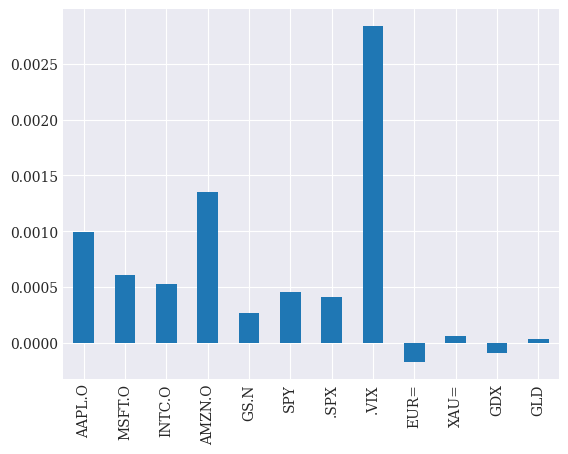

In [209]:
# Mean relative returns 
df.pct_change().round(2).mean().plot(kind='bar')

More commonly used in Finance than absolute or relative returns are logarithimic (short: "log") returns. Their main advantage is being additive over time, so: $R_i = \sum_k^i R_k $ where $R_i = ln(\frac{P_i}{P_0})$ are the returns accumulated at time $t_i$. This is a lot more convenient vis-à-vis relative returns, those have to be multiplied together to get the final return. 

Another advantage is being dimensionless and revealing the uniform distributions of the securities in multiple orders of magnitude.

Nice analogy: the difference between log returns and relative returns is the same as between strain and true strain in elasto-mechanics! Another way to say this is that relative returns are the first order Taylor approximation of log returns, so they are equivalent over small timescales.

In [210]:
# Log returns
log_returns = np.log(df / df.shift(1))

Below we check whether the formula $R_{log} = ln(1+R_{rel})$ holds true by comparing it to the definition of the logarithmic returns.

In [211]:
df.dropna(inplace=True) 
np.log(1 + df.pct_change()) == np.log(df / df.shift(1))

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,False,False,False,False,False,False,False,False,False,False,False,False
2010-01-05,True,True,True,True,True,True,True,True,True,True,True,True
2010-01-06,True,True,True,True,True,True,True,True,True,True,True,True
2010-01-07,True,True,True,True,True,True,True,True,True,True,True,True
2010-01-08,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,True,True,True,True,True,True,True,True,True,True,True,True
2018-06-26,True,True,True,True,True,True,True,True,True,True,True,True
2018-06-27,True,True,True,True,True,True,True,True,True,True,True,True


Now we use the addivity over time property to easily visualize the performances of the securities by performing a cumulative sum.

<Axes: xlabel='Date'>

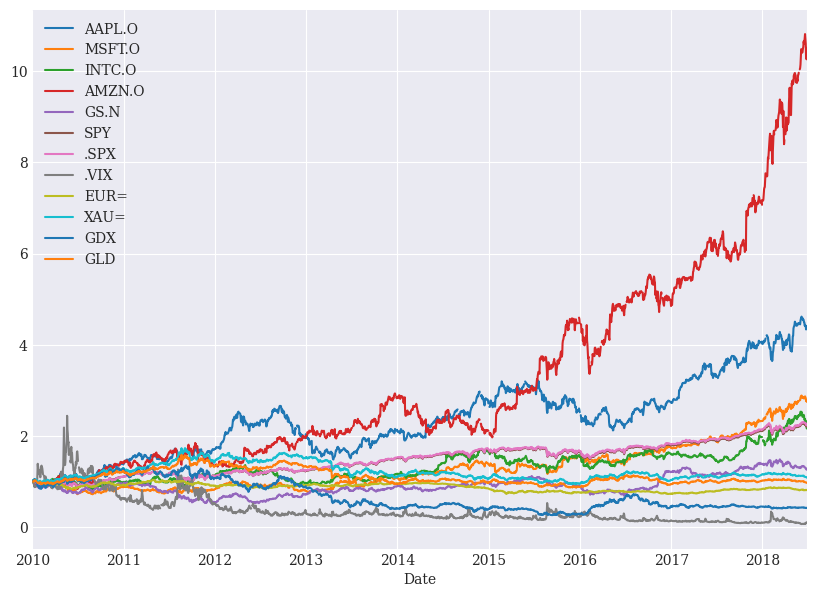

In [212]:
cum_returns = log_returns.cumsum().apply(np.exp)
cum_returns.plot(figsize=(10,7))

Here you can see the great advantage of log returns, all the graphs start out at the same place and you can easily see how much gains you would have had if you had put in 1 \$ in 2010, specifically for Apple you would have made over 10 \$, so a > 1000% return.

<Axes: xlabel='Date'>

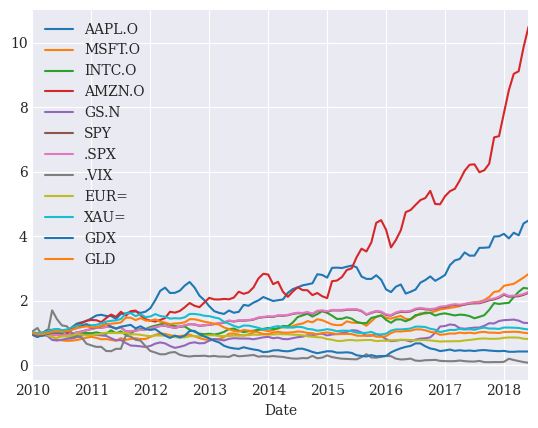

In [213]:
# Resampled at each months end
cum_ret_resampled = cum_returns.resample('1ME')
cum_ret_resampled.mean().plot()

In [214]:
apple = df['AAPL.O']
apple = apple.dropna()
apple

Date
2010-01-04     30.572827
2010-01-05     30.625684
2010-01-06     30.138541
2010-01-07     30.082827
2010-01-08     30.282827
                 ...    
2018-06-25    182.170000
2018-06-26    184.430000
2018-06-27    184.160000
2018-06-28    185.500000
2018-06-29    185.110000
Name: AAPL.O, Length: 2138, dtype: float64

Because the current data is too finely distributed in time we perform moving averages, in pandas so-called rolling averages. The syntax is really simply here, you just call the method `.rolling()` and it automatically adjusts all methods appended after itself.

<Axes: xlabel='Date'>

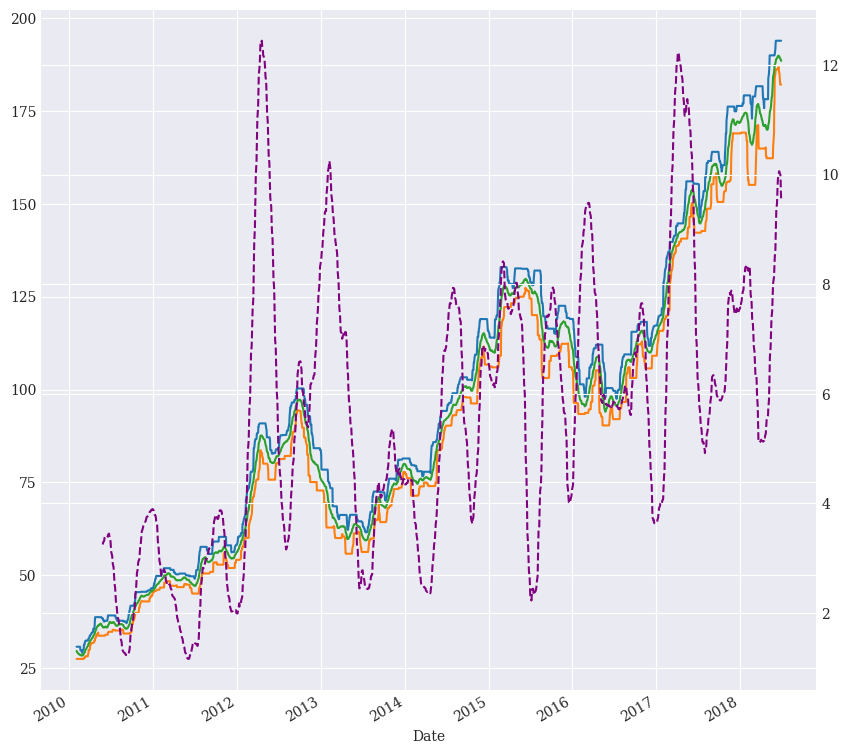

In [215]:
# Rolling statistics
window = 20

fig, ax1 = plt.subplots(figsize=(10, 10))

# Plot max, min, and mean on the primary y-axis
apple.rolling(window=window).max().plot(ax=ax1, label='Max')
apple.rolling(window=window).min().plot(ax=ax1, label='Min')
apple.rolling(window=window).mean().plot(ax=ax1, label='Mean')

# Create a secondary y-axis for the standard deviation
ax2 = ax1.twinx()
apple.rolling(window=5*window).std().plot(ax=ax2, color='purple', label='Std', linestyle='--')


Now we compute the exponentially moving average EWMA. It's very useful because it takes into account the entire history, just with lower and lower weights (exponentially decreasing). One can decide by the parameter `alpha` whether to favor current or past data. 

It is computed like this: $EWMA_i = \alpha x_i + (1-\alpha) EWMA_{i-1}$

We see that it is basically a linear interpolation but recursively applied which means that the past values do never "fall out the window" like in the rolling average.

<Axes: xlabel='Date'>

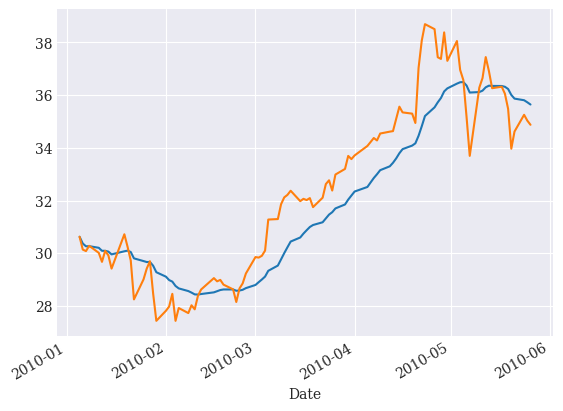

In [216]:
# Exponentially weighted moving average
apple.iloc[1:100].ewm(alpha=0.1).mean().plot()
apple.iloc[1:100].plot()

If you are wondering: the rolling average applies its computed value to the last index inside of its window. It is only looking backward, this eliminates any "foresight-bias" that we want to avoid when performing financial calculations.



Below we look at the standard rolling averages. Look at the high local maxima and notice that they are "forgotten" after a certain amount of time (the window size). Also interesting: the min and max hug the graph from the left to the right. 

<Axes: xlabel='Date'>

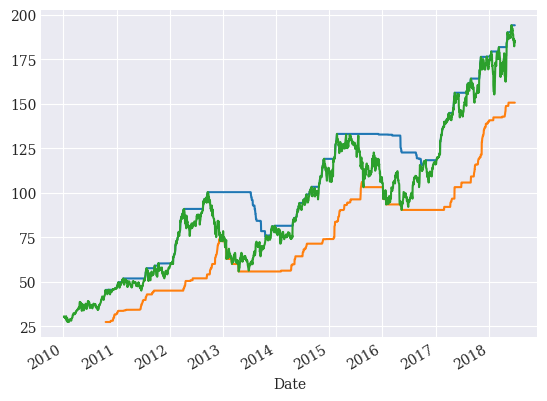

In [217]:
apple.rolling(window=10*window).max().plot()
apple.rolling(window=10*window).min().plot()
apple.plot()

Here we do the same thing but just for the last 200 days of the dataset. We also include the rolling mean and median. The median might be more appropiate here because it is less sensitive to outliers.

<Axes: xlabel='Date'>

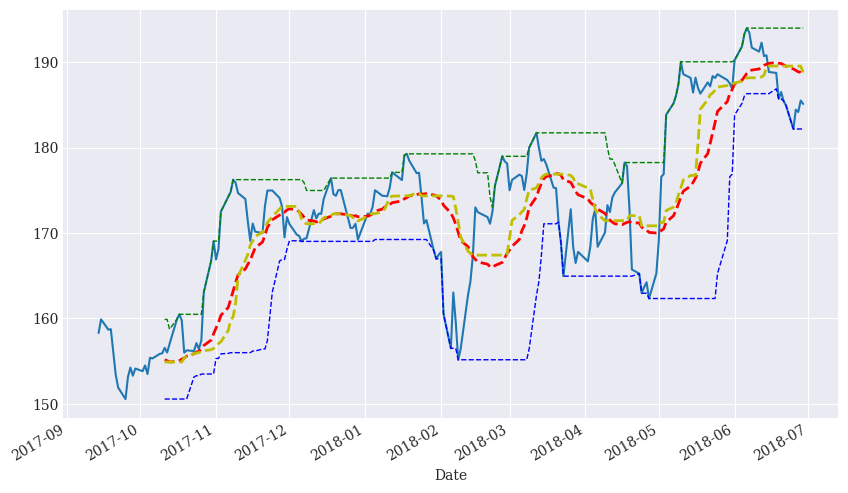

In [218]:
apple_last = apple.iloc[-200:]
apple_last.plot(figsize=(10,6))
apple_last_rolling = apple_last.rolling(window=window)
apple_last_rolling.mean().plot(style='r--',lw=2)
apple_last_rolling.median().plot(style='y--',lw=2)

apple_last_rolling.min().plot(style='b--',lw=1)
apple_last_rolling.max().plot(style='g--',lw=1)

# Testing trading strategies

Now we actually want to apply what we learned before in order to develop trading strategies that can be used to turn a profit. At least that's we aim for.

The first and simplest one is the Two-Rolling-Window strategy. It consists of one short and one long rolling mean of the stock price. The very simple theory behind this is that if the shorter one exceeds the longer one then this means that we are in an uncharacteriscally high upswing and should "go long" on the stock. The reverse means that we should "go short".

Going long and short refers to actions that benefit us if the stock price rises or falls respectively. This could be simply buying the stock, buying an inverse fund or using derivatives.

<Axes: xlabel='Date'>

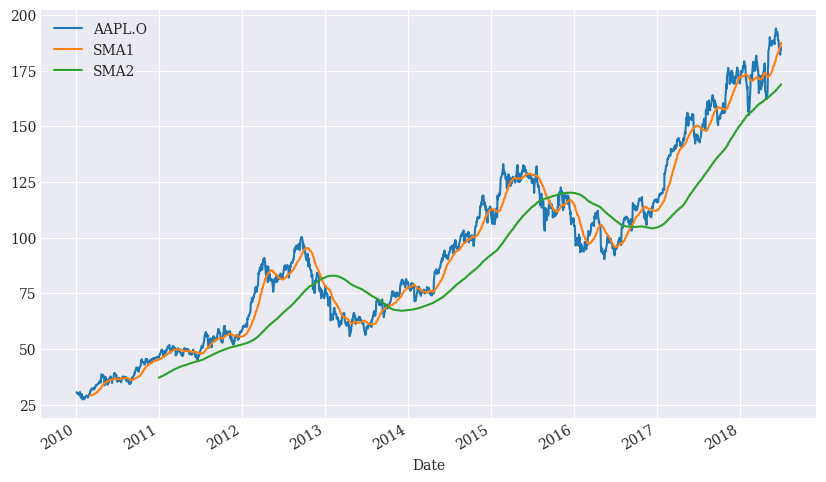

In [219]:
# Two SMA strategy
df['SMA1'] = apple.rolling(window=42).mean()
df['SMA2'] = apple.rolling(window=252).mean()
df[['AAPL.O','SMA1','SMA2']].plot(figsize=(10,6))

Now we want to visualize the strategy we expressed in words above. We do this by creating a "trading signal" that is defined by a boolean statement.

In [220]:
# Create a NumPy array with ones, this is going to be the initial data 
# for the trading signal column.

df.dropna(inplace=True)
ones_column = np.ones((len(df), 1))
negative_ones_column=-1*ones_column


In [221]:
(df['SMA1']<df['SMA2']).describe()

count      1887
unique        2
top       False
freq       1434
dtype: object

In [222]:
(df['SMA1']<df['SMA2']).value_counts()

False    1434
True      453
Name: count, dtype: int64

In [223]:

# Add the ones column as the new signal column called 'positions'
df['positions'] = ones_column

# Now assign the correct values to the signal column based on the 
# relation of the two rolling means.
df['positions'] = np.where((df['SMA1']>df['SMA2']),1,-1)

df['positions'].value_counts()

positions
 1    1434
-1     453
Name: count, dtype: int64

Below you can see the visualization of the trading signal as a square wave above the stock price and the rolling means.

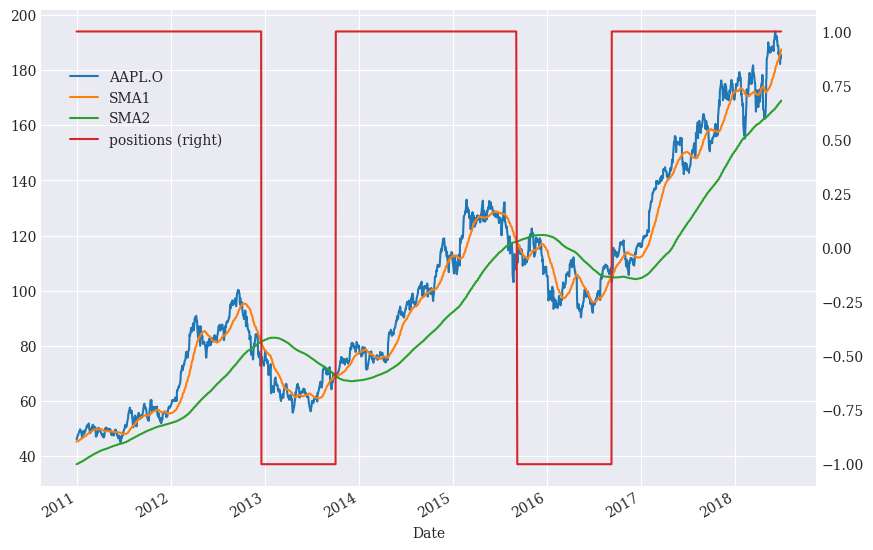

In [224]:
plot = df[['AAPL.O','SMA1','SMA2','positions']].plot(secondary_y='positions',figsize=(10,7))
plot.get_legend().set_bbox_to_anchor((0.25,0.9))

We see that this strategy is not particulary efficient because we only perform four trades in the span of more than seven years.

# Volatility

In this section we will further explore the measure of volatility which is defined as the standard deviation of logarithmic returns.

In [225]:
# .SPX is the S&P 500 index, SPY is an ETF on this index.
# Names preceded by a period are not tradeable, such as .SPX and .VIX.
data = df[['.SPX','.VIX']].dropna()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

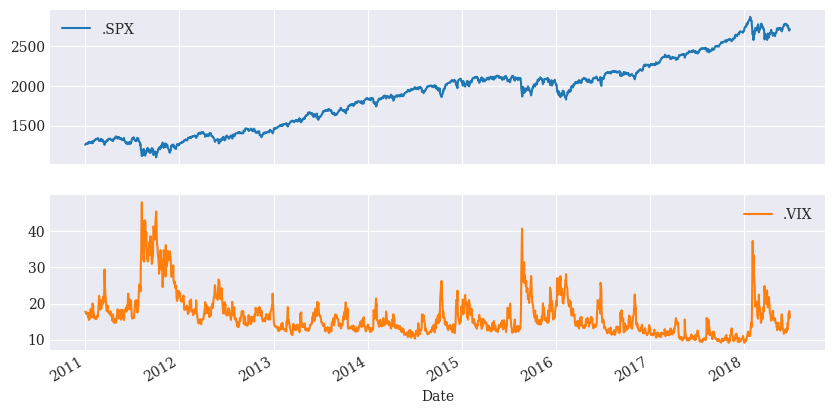

In [226]:
data.plot(subplots=True,figsize=(10,5))

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1887 entries, 2010-12-31 to 2018-06-29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    1887 non-null   float64
 1   .VIX    1887 non-null   float64
dtypes: float64(2)
memory usage: 44.2 KB


We want to investigate the hypothesis whether or not the S&P 500 is negatively correlated with its volatility. The reasoning behind it is that when the price falls, trading volume increases due to panic which decreases the price further and thus volatility increases also. It's important to note that this is not a causal effect.

We first compute the correlation between the rolling S&P 500 and the volatility for each one-year time period, the rolling window is also automatically applied to the volatility.

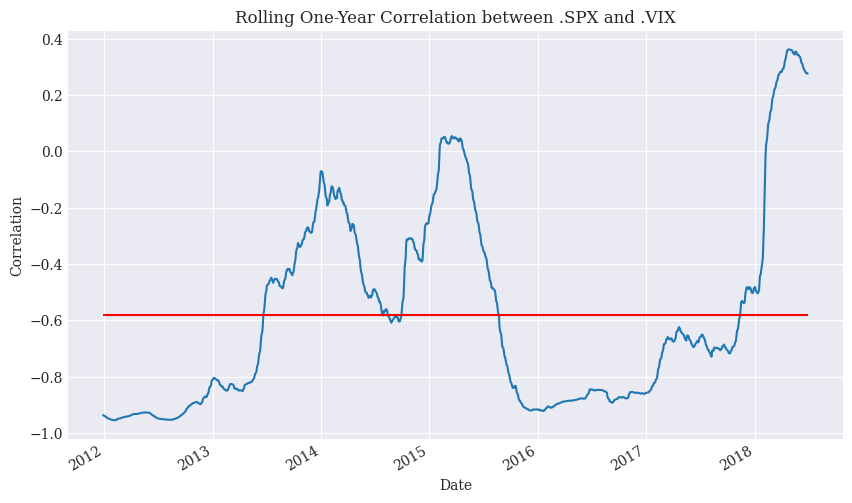

In [228]:
correlations = data['.SPX'].rolling(window=252).corr(data['.VIX'])

# Plot the rolling correlation
ax = correlations.plot(figsize=(10, 6), title="Rolling One-Year Correlation between .SPX and .VIX",
                  ylabel='Correlation')
# We plot the mean also, the 252 index is because the rolling mean lags 
# behind the price with a one year delay.
ax.hlines(y=correlations.mean(),xmin=correlations.index[252],
          xmax=correlations.index[-1],colors='r')

In [229]:
correlations.mean()

np.float64(-0.5789986044404959)

We see that the values of the correlation vary wildly throughout time, sometimes even becoming positive. In general though the observation holds true, with a mean correlation of $-58\%$.

Below you can see the chart for the one-year period with the strongest correlation right at the beginning. The relationship is striking.

<Axes: xlabel='Date'>

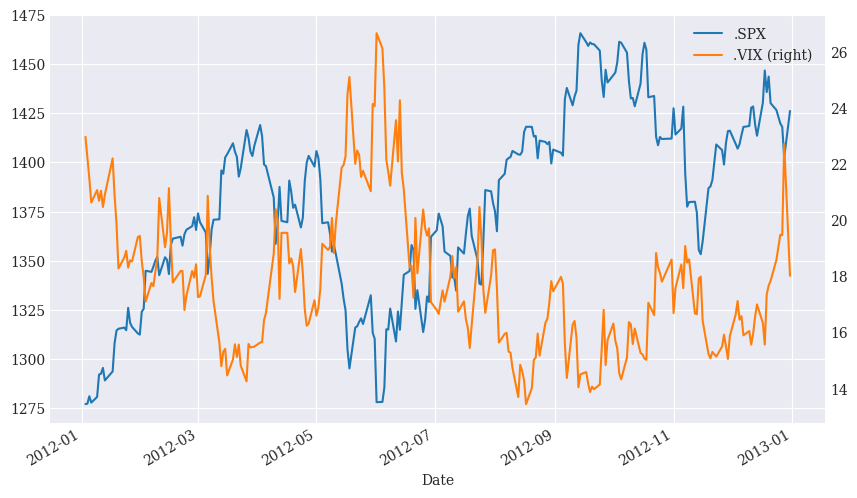

In [230]:
data.loc['2011-12-31':'2012-12-31', :].plot(secondary_y='.VIX', figsize=(10, 6))


We now investigate the relationship when we use log returns instead of the stock price.

In [231]:
spx = '.SPX'
df[['.SPXlog','.VIXlog']] = np.log(data[['.SPX','.VIX']]/data[['.SPX','.VIX']].shift(1))

<Axes: xlabel='Date'>

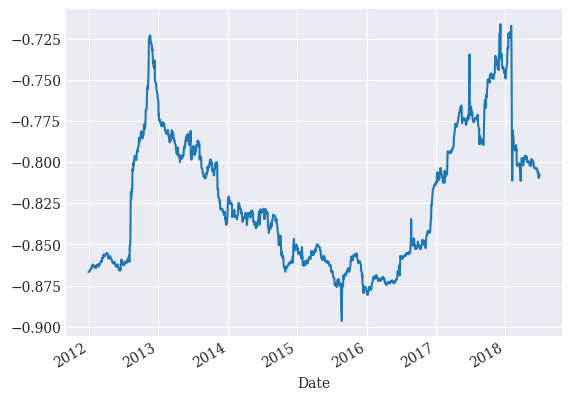

In [232]:
corr = df['.SPXlog'].rolling(window=252).corr(df['.VIXlog'])
corr.plot()

Log returns give same correlation as relative returns.

We now have a look at the covariance between the two.

array([[<Axes: xlabel='.SPXlog', ylabel='.SPXlog'>,
        <Axes: xlabel='.VIXlog', ylabel='.SPXlog'>],
       [<Axes: xlabel='.SPXlog', ylabel='.VIXlog'>,
        <Axes: xlabel='.VIXlog', ylabel='.VIXlog'>]], dtype=object)

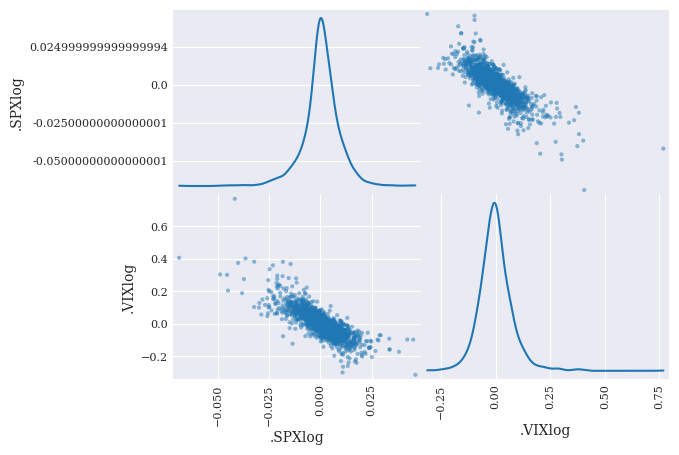

In [233]:
# Correlation in 2D, covariance
df.dropna(inplace=True)
pd.plotting.scatter_matrix(df[['.SPXlog','.VIXlog']],
                           diagonal='kde', # kernel density estimator instead of histogram
                           hist_kwds={'bins':35})

Log returns are used here because they have the big advantage of transforming both indicators to the same dimensionless scale, making comparison very easy.

We perform a linear regression to quantify their covariance.

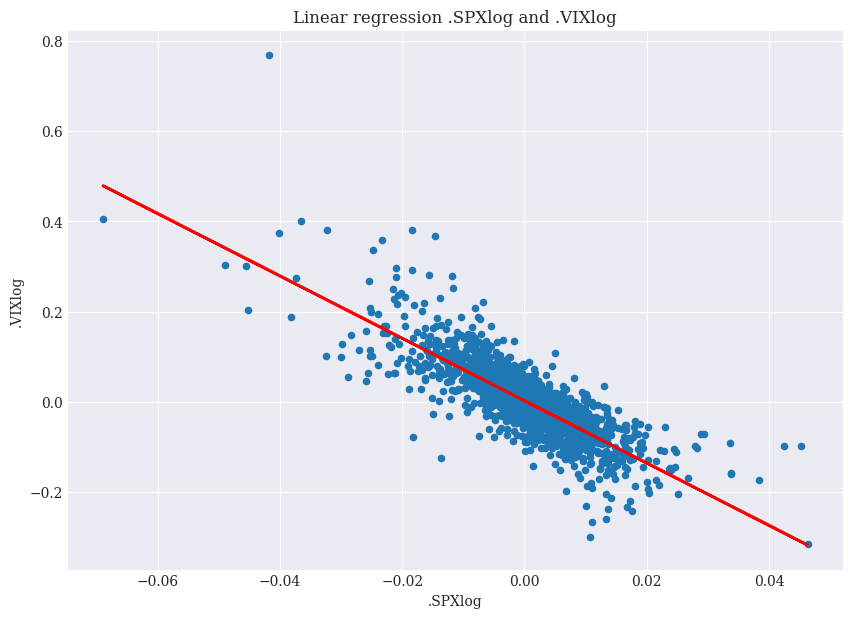

In [234]:
# Least squares for correlation
# Ax = b with x the parameters, b=VIX, x = (m,c)^T, A = [(SPX1, 1),(SPX2, 1),...]
reg = np.polyfit(df['.SPXlog'],df['.VIXlog'],deg=1)
log_returns = df[['.SPXlog','.VIXlog']]
ax = log_returns.plot(kind='scatter',x='.SPXlog',y='.VIXlog',
                      figsize=(10,7),title="Linear regression .SPXlog and .VIXlog")
ax.plot(log_returns['.SPXlog'], np.polyval(p=reg,x=log_returns['.SPXlog']),
        'r',lw=2)

-0.8232484979756886


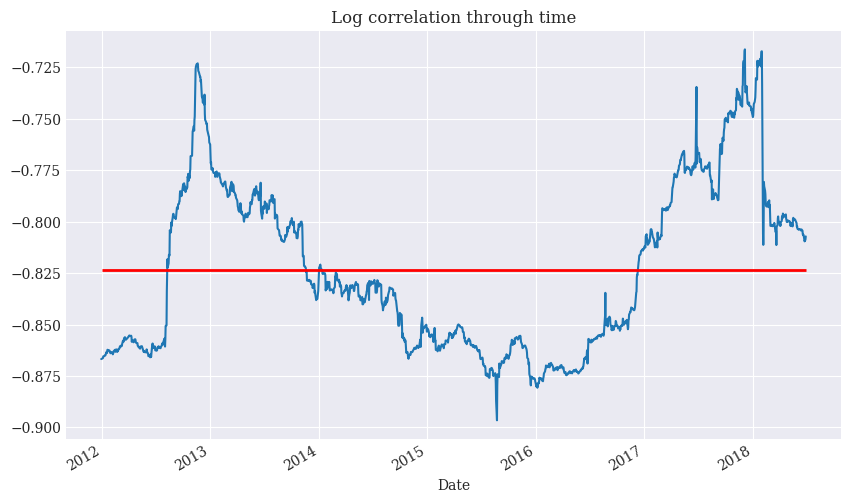

In [235]:
mean_corr = df['.SPXlog'].rolling(window=252).corr(df['.VIXlog']).mean()
print(mean_corr)
ax = df['.SPXlog'].rolling(window=252).corr(df['.VIXlog']).plot(
    title="Log correlation through time",figsize=(10,6))
ax.hlines(y=mean_corr,xmin=df.index[252],xmax=df.index[-1],color='r',lw=2,
          label='Mean')

We want to prove that using the data directly without performing the log transformation is not useful. We see in the plot below that there is a bias for certain values in the S&P 500 price, it is not uniformly distributed. This means that the correlation values would be misleading.

This reminds me of Benford's law, should be further investigated.

array([[<Axes: xlabel='.SPX', ylabel='.SPX'>,
        <Axes: xlabel='.VIX', ylabel='.SPX'>],
       [<Axes: xlabel='.SPX', ylabel='.VIX'>,
        <Axes: xlabel='.VIX', ylabel='.VIX'>]], dtype=object)

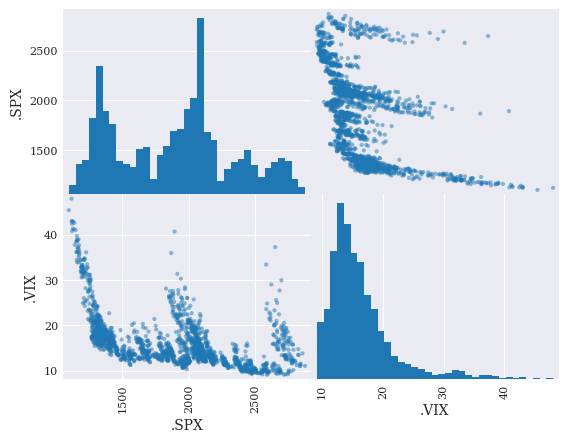

In [236]:
price = df[['.SPX','.VIX']]
pd.plotting.scatter_matrix(price,diagonal='hist',hist_kwds={'bins':35})

In [237]:
log_returns.corr()

,.SPXlog,.VIXlog
.SPXlog,1.000000,-0.802429
.VIXlog,-0.802429,1.000000


# High Frequency Data

Next we are going to take a look at "tick" data. This means raw data from the financial trading day with no resampling applied. It essentially contains every transaction done on the market. Each transaction comes with its timestamp and the bid and ask prices at that moment.

The bid price is the highest price that a buyer is willing to buy the security for at this moment. The ask price is the lowest price that a seller is willing to sell for.

In [238]:
# High tick frequency data
tick = pd.read_csv('./data/fxcm_eur_usd_tick_data.csv',
        index_col=0,parse_dates=True)
tick.index.diff() # as you can see the sampling time is not constant

TimedeltaIndex([                     NaT, '0 days 00:00:00.024000',
                '0 days 00:00:00.008000', '0 days 00:00:00.007000',
                '0 days 00:00:00.030000', '0 days 00:00:00.007000',
                '0 days 00:00:00.012000', '0 days 00:00:00.006000',
                '0 days 00:00:00.065000', '0 days 00:00:00.222000',
                ...
                '0 days 00:00:00.002000', '0 days 00:00:01.709000',
                '0 days 00:00:00.005000', '0 days 00:00:00.335000',
                '0 days 00:00:01.629000', '0 days 00:00:05.520000',
                '0 days 00:00:00.268000', '0 days 00:00:00.232000',
                '0 days 00:00:00.073000', '0 days 00:00:00.023000'],
               dtype='timedelta64[ns]', length=461357, freq=None)

In [239]:
tick.describe()

,Bid,Ask
count,461357.000000,461357.000000
mean,1.164513,1.164524
std,0.002441,0.002440
min,1.156320,1.156330
25%,1.163510,1.163530
50%,1.164720,1.164730
75%,1.165850,1.165860
max,1.169040,1.169070


We add a third column called "mid" which contains the mean between the bid and ask prices.

In [240]:
tick.dropna(inplace=True)
tick['Mid'] = tick.mean(axis=1)
tick['Mid']

2018-06-29 00:00:00.082    1.156355
2018-06-29 00:00:00.106    1.156350
2018-06-29 00:00:00.114    1.156345
2018-06-29 00:00:00.121    1.156340
2018-06-29 00:00:00.151    1.156330
                             ...   
2018-06-29 20:59:00.011    1.168370
2018-06-29 20:59:00.279    1.168375
2018-06-29 20:59:00.511    1.168385
2018-06-29 20:59:00.584    1.168395
2018-06-29 20:59:00.607    1.168385
Name: Mid, Length: 461357, dtype: float64

<Axes: >

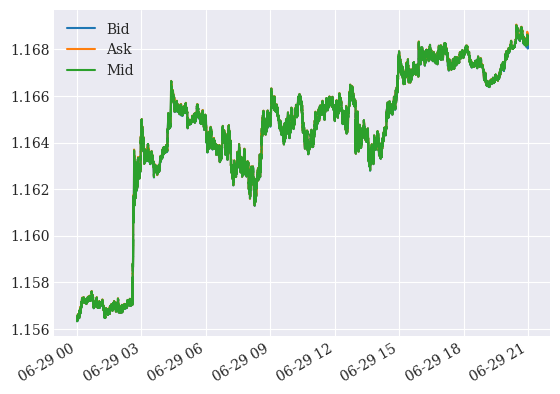

In [241]:
tick.plot()

We resample to 5 minutes, this makes the interval i.e. the sampling time constant, which is quite useful for further development or analysis.

<Axes: >

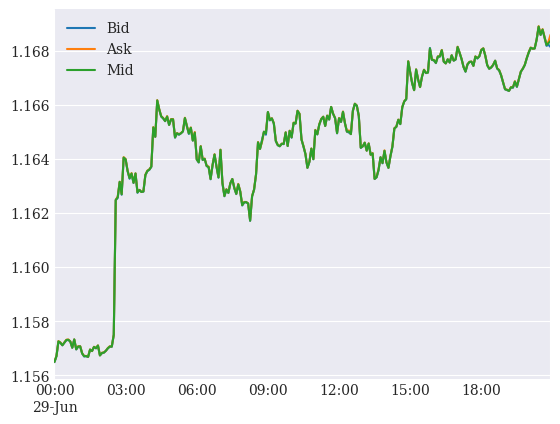

In [242]:
resampled = tick.resample(rule='5min').last()
resampled.describe()
resampled.plot()

# Conclusion

We explored the fundamentals of technical analysis, focusing on how to apply the Python `pandas` package for this task.

We learned about the different types of returns, rolling averages, the connection between volatility and returns and finally tick data.

Next time we will dive deeper into how one could evaluate the performance of trading strategies using backtests and permutation testing of the price history to detect overfitting.

Thanks for reading! Best, Marius